In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

In [ ]:
from google.colab import files
import io
archivo=files.upload()

dtype_dict = { 'Gender':str,'Age':int,'Height':float,'Weight':float,
    'family_history_with_overweight':str,'FAV':str,'FCVC':int,'NCP':int,
    'CAEC':str,'SMOKE':str,'CH2O':int,'SCC':str,'FAF':int,'TUE':int,
    'CALC':str,'MTRANS':str,'NObeyesdad':str
}

dataframe=pd.read_csv(io.BytesIO(archivo['ObesidadDataSet.csv']),delimiter=";",dtype=dtype_dict)

Saving ObesidadDataSet.csv to ObesidadDataSet.csv


**Eliminación de datos atípicos**

In [ ]:
lim_inf_age = 14
lim_sup_age = 61

lim_inf_weight = 39
lim_sup_weight = 143

lim_inf_height = 1.45
lim_sup_height = 1.98

df_cleaned = dataframe[
    (dataframe['Age'] >= lim_inf_age) & (dataframe['Age'] <= lim_sup_age) &
    (dataframe['Weight'] >= lim_inf_weight) & (dataframe['Weight'] <= lim_sup_weight) &
    (dataframe['Height'] >= lim_inf_height) & (dataframe['Height'] <= lim_sup_height)
]

print(f'Tamaño del dataset original: {dataframe.shape}')
print(f'Tamaño del dataset "limpiado": {df_cleaned.shape}')

import plotly.express as px

fig_age_original = px.histogram(dataframe, x='Age', title='Distribución de Age (Original)')
fig_age_cleaned = px.histogram(df_cleaned, x='Age', title='Distribución de Age (Limpiada)')

fig_weight_original = px.histogram(dataframe, x='Weight', title='Distribución de Weight (Original)')
fig_weight_cleaned = px.histogram(df_cleaned, x='Weight', title='Distribución de Weight (Limpiada)')

fig_height_original = px.histogram(dataframe, x='Height', title='Distribución de Height (Original)')
fig_height_cleaned = px.histogram(df_cleaned, x='Height', title='Distribución de Height (Limpiada)')

fig_age_original.show()
fig_age_cleaned.show()
fig_weight_original.show()
fig_weight_cleaned.show()
fig_height_original.show()
fig_height_cleaned.show()


Tamaño del dataset original: (2111, 17)
Tamaño del dataset "limpiado": (2085, 17)


**Transformación de categorías de texto a número**

In [ ]:
encoderGender=LabelEncoder()
dataframe["Gender"]=encoderGender.fit_transform(dataframe["Gender"])

encoderFamiliHistory=LabelEncoder()
dataframe["family_history_with_overweight"]=encoderFamiliHistory.fit_transform(dataframe["family_history_with_overweight"])

encoderFAVC=LabelEncoder()
dataframe["FAVC"]=encoderFAVC.fit_transform(dataframe["FAVC"])

encoderCAEC=LabelEncoder()
dataframe["CAEC"]=encoderCAEC.fit_transform(dataframe["CAEC"])

encoderSMOKE=LabelEncoder()
dataframe["SMOKE"]=encoderSMOKE.fit_transform(dataframe["SMOKE"])

encoderSCC=LabelEncoder()
dataframe["SCC"]=encoderSCC.fit_transform(dataframe["SCC"])

encoderCALC=LabelEncoder()
dataframe["CALC"]=encoderCALC.fit_transform(dataframe["CALC"])

encoderMTRANS=LabelEncoder()
dataframe["MTRANS"]=encoderMTRANS.fit_transform(dataframe["MTRANS"])

encoderNObeyesdad=LabelEncoder()
dataframe["NObeyesdad"]=encoderNObeyesdad.fit_transform(dataframe["NObeyesdad"])

dataframe.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21,1.62,64.0,1,0,2,3,2,0,2,0,0,1,3,3,1
1,0,21,1.52,56.0,1,0,3,3,2,1,3,1,3,0,2,3,1
2,1,23,1.80,77.0,1,0,2,3,2,0,2,0,2,1,1,3,1
3,1,27,1.80,87.0,0,0,3,3,2,0,2,0,2,0,1,4,5
4,1,22,1.78,89.8,0,0,2,1,2,0,2,0,0,0,2,3,6
5,1,29,1.62,53.0,0,1,2,3,2,0,2,0,0,0,2,0,1
6,0,23,1.50,55.0,1,1,3,3,2,0,2,0,1,0,2,2,1
7,1,22,1.64,53.0,0,0,2,3,2,0,2,0,3,0,2,3,1
8,1,24,1.78,64.0,1,1,3,3,2,0,2,0,1,1,1,3,1
9,1,22,1.72,68.0,1,1,2,3,2,0,2,0,1,1,3,3,1


**Implementación Árbol de Decisión**

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

y = dataframe['NObeyesdad']
X=dataframe.drop(["CAEC", "CH2O", "SCC", "FAF", "TUE", "MTRANS", "NObeyesdad"],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)
modelo = DecisionTreeClassifier(max_depth=6)
modelo.fit(X_train, y_train)

yPredict=modelo.predict(X_train)
print("Train Accuracy ",metrics.accuracy_score(y_train,yPredict))
yPredict=modelo.predict(X_test)
print("Test Accuracy ",metrics.accuracy_score(y_test,yPredict))

accuracy = accuracy_score(y_test, yPredict)
report = classification_report(y_test, yPredict)

print(f'Precisión del modelo: {accuracy}')
print('Informe de clasificación:')
print(report)


Train Accuracy  0.9083728278041074
Test Accuracy  0.8867924528301887
Precisión del modelo: 0.8867924528301887
Informe de clasificación:
              precision    recall  f1-score   support

           0       1.00      0.87      0.93        31
           1       0.83      0.69      0.75        35
           2       0.95      0.95      0.95        38
           3       1.00      0.97      0.99        35
           4       1.00      1.00      1.00        30
           5       0.57      0.95      0.71        22
           6       0.94      0.76      0.84        21

    accuracy                           0.89       212
   macro avg       0.90      0.88      0.88       212
weighted avg       0.91      0.89      0.89       212



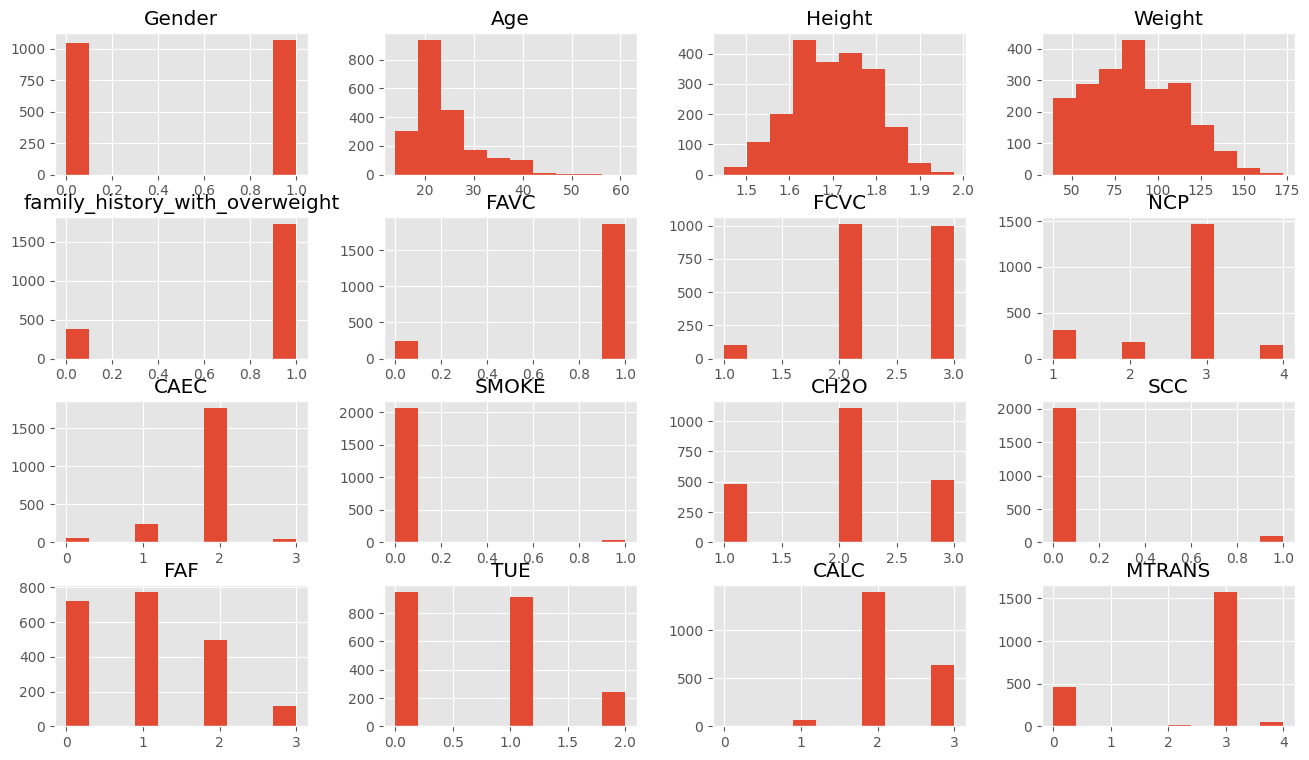

In [ ]:
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

dataframe.drop(["NObeyesdad"],axis=1).hist()
plt.show()

[[27  4  0  0  0  0  0]
 [ 0 24  0  0  0 11  0]
 [ 0  0 36  0  0  1  1]
 [ 0  0  1 34  0  0  0]
 [ 0  0  0  0 30  0  0]
 [ 0  1  0  0  0 21  0]
 [ 0  0  1  0  0  4 16]]


<Axes: >

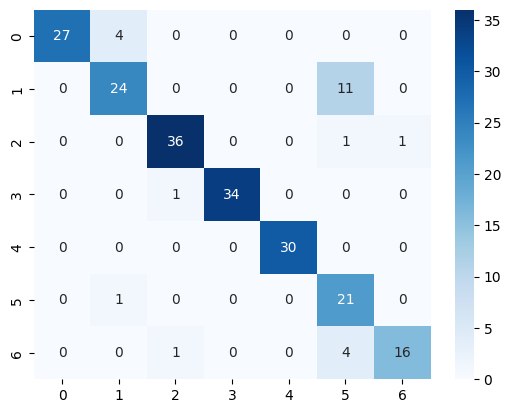

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sb
matriz=confusion_matrix(y_test,yPredict)
print(matriz)
sb.heatmap(matriz,annot=True,cmap="Blues")

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report

precision, recall, f1, support = precision_recall_fscore_support(y_test, yPredict, average=None)
target_names = dataframe["NObeyesdad"].unique()

for i, label in enumerate(target_names):
    print(f"Métricas para {label}:")
    print(f"Precisión: {precision[i]}")
    print(f"Recuperación: {recall[i]}")
    print(f"Puntuación F1: {f1[i]}")
    print(f"Soporte: {support[i]}")

report = classification_report(y_test, yPredict, labels=target_names)
print("Informe de clasificación:")
print(report)


Métricas para 1:
Precisión: 1.0
Recuperación: 0.8709677419354839
Puntuación F1: 0.9310344827586207
Soporte: 31
Métricas para 5:
Precisión: 0.8275862068965517
Recuperación: 0.6857142857142857
Puntuación F1: 0.75
Soporte: 35
Métricas para 6:
Precisión: 0.9473684210526315
Recuperación: 0.9473684210526315
Puntuación F1: 0.9473684210526315
Soporte: 38
Métricas para 2:
Precisión: 1.0
Recuperación: 0.9714285714285714
Puntuación F1: 0.9855072463768115
Soporte: 35
Métricas para 0:
Precisión: 1.0
Recuperación: 1.0
Puntuación F1: 1.0
Soporte: 30
Métricas para 3:
Precisión: 0.5675675675675675
Recuperación: 0.9545454545454546
Puntuación F1: 0.711864406779661
Soporte: 22
Métricas para 4:
Precisión: 0.9411764705882353
Recuperación: 0.7619047619047619
Puntuación F1: 0.8421052631578947
Soporte: 21
Informe de clasificación:
              precision    recall  f1-score   support

           1       0.83      0.69      0.75        35
           5       0.57      0.95      0.71        22
           6       

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

target_names = dataframe["NObeyesdad"].unique()
caracteristicas = X_train.columns
caracteristicas = [str(feature) for feature in caracteristicas]
target_names = [str(label) for label in target_names]
export_graphviz(modelo, out_file="arbol.dot", class_names=target_names, feature_names=caracteristicas, impurity=False, filled=True)

with open("arbol.dot") as f:
    dot_graph = f.read()
graph = graphviz.Source(dot_graph)
graph.view("arbol")

'arbol.pdf'

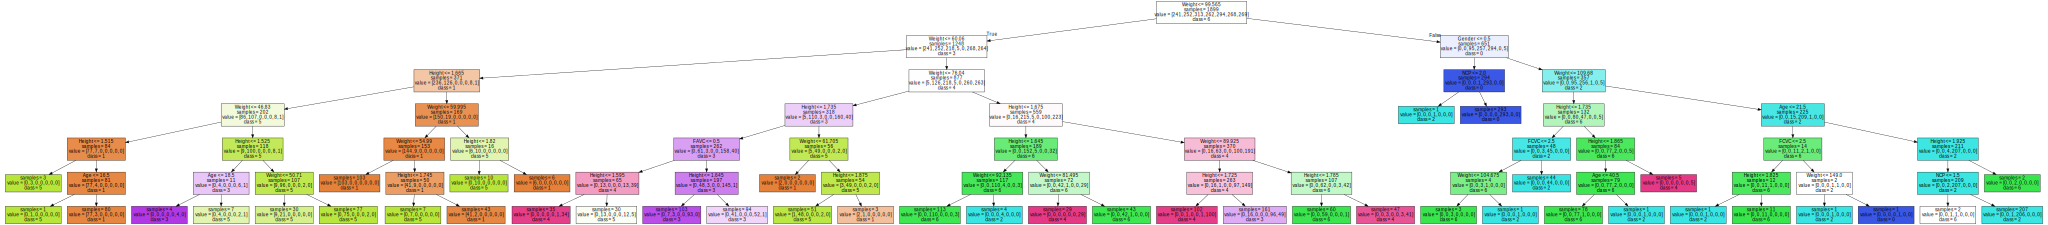

In [ ]:
with open("arbol.dot") as f:
  dot_graph=f.read()
graphviz.Source(dot_graph)

**Validación cruzada**

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report, accuracy_score

precision, recall, f1, support = precision_recall_fscore_support(y_test, yPredict, average='micro')
accuracy = accuracy_score(y_test, yPredict)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Support:", support)

target_names = dataframe["NObeyesdad"].unique()
print(classification_report(y_test, yPredict, labels=target_names))

Accuracy: 0.8867924528301887
Precision: 0.8867924528301887
Recall: 0.8867924528301887
F1-score: 0.8867924528301887
Support: None
              precision    recall  f1-score   support

           1       0.83      0.69      0.75        35
           5       0.57      0.95      0.71        22
           6       0.94      0.76      0.84        21
           2       0.95      0.95      0.95        38
           0       1.00      0.87      0.93        31
           3       1.00      0.97      0.99        35
           4       1.00      1.00      1.00        30

    accuracy                           0.89       212
   macro avg       0.90      0.88      0.88       212
weighted avg       0.91      0.89      0.89       212

